# Prediksi Rumah Jogja

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
data = pd.read_csv("data.csv", sep=';')

### Inspecting and cleaning the data

In [3]:
# Printing the 1st 5 columns
data.head()

,Harga,Kecamatan,KT,KM,LT,LB,Lantai,Furnished,Carport
0,1500000000,1,3,2,98,85,2,0,0
1,1900000000,5,4,3,90,120,2,0,2
2,875000000,2,4,2,87,140,2,1,1
3,900000000,2,4,2,87,140,2,0,1
4,1200000000,2,4,2,80,100,2,0,0


In [4]:
# Printing the dimensions of data
data.shape

(731, 9)

In [5]:
# Viewing the column heading
data.columns

Index(['Harga', 'Kecamatan', 'KT', 'KM', 'LT', 'LB', 'Lantai', 'Furnished',
       'Carport'],
      dtype='object')

In [6]:
data.dtypes

Harga        int64
Kecamatan    int64
KT           int64
KM           int64
LT           int64
LB           int64
Lantai       int64
Furnished    int64
Carport      int64
dtype: object

In [7]:
# Identifying the unique number of values in the dataset
data.nunique()

Harga        128
Kecamatan     14
KT            31
KM            25
LT           304
LB           161
Lantai         3
Furnished      3
Carport        7
dtype: int64

In [8]:
# Checking if any NULL values are present in the dataset
data.isnull().sum()

Harga        0
Kecamatan    0
KT           0
KM           0
LT           0
LB           0
Lantai       0
Furnished    0
Carport      0
dtype: int64

In [9]:
# Viewing the data statistics
data.describe()

,Harga,Kecamatan,KT,KM,LT,LB,Lantai,Furnished,Carport
count,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,4.081795e+09,4.103967,6.043776,4.257182,351.038304,280.595075,1.597811,0.487004,0.261286
std,4.701122e+09,3.112084,5.315859,4.185043,335.317570,215.844719,0.528317,0.778677,0.799910
min,3.500000e+08,0.000000,1.000000,1.000000,40.000000,40.000000,1.000000,0.000000,0.000000
25%,1.400000e+09,2.000000,3.000000,2.000000,136.500000,140.000000,1.000000,0.000000,0.000000
50%,2.500000e+09,3.000000,4.000000,3.000000,240.000000,220.000000,2.000000,0.000000,0.000000
75%,4.800000e+09,7.000000,6.000000,5.000000,442.000000,350.000000,2.000000,1.000000,0.000000
max,3.700000e+10,13.000000,64.000000,64.000000,2852.000000,2000.000000,3.000000,2.000000,13.000000


### Data Visualization

In [10]:
# Finding out the correlation between the features
corr = data.corr()
corr.shape

(9, 9)

In [11]:
corr_mat = data.corr().Harga.sort_values(ascending=False)
corr_mat

Harga        1.000000
LT           0.704763
LB           0.593226
Kecamatan    0.352445
KM           0.306054
KT           0.266034
Furnished    0.041842
Carport     -0.012014
Lantai      -0.042437
Name: Harga, dtype: float64

### Jumlah Rumah di Jual berdasarkan Kecamatan

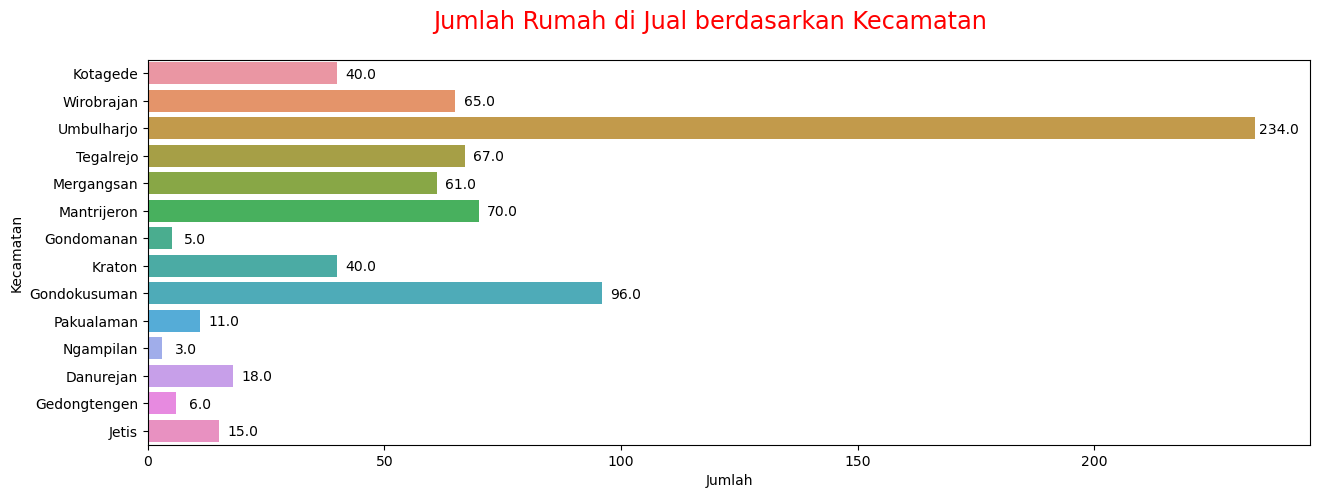

In [87]:
result = data.groupby(['Kecamatan']).size()
labels = ["Kotagede","Wirobrajan","Umbulharjo","Tegalrejo","Mergangsan","Mantrijeron","Gondomanan","Kraton",
        "Gondokusuman","Pakualaman","Ngampilan","Danurejan","Gedongtengen","Jetis"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah di Jual berdasarkan Kecamatan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values) 

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Jumlah')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             format(width),
             ha='center', va='center')
    
plt.show() 

### Rata2 Harga berdasarkan Kecamatan

In [94]:
result = data.groupby(['Kecamatan'])['Harga'].mean().sort_values(ascending=False)
result

Kecamatan
12    7.666667e+09
11    7.405556e+09
8     7.308333e+09
13    6.513267e+09
7     6.318750e+09
9     5.945455e+09
10    4.866667e+09
6     4.400000e+09
4     4.354918e+09
3     3.631493e+09
5     3.482857e+09
2     2.764953e+09
1     2.568846e+09
0     2.092725e+09
Name: Harga, dtype: float64

In [96]:
2.092725*1000000000

2092725000.0000002

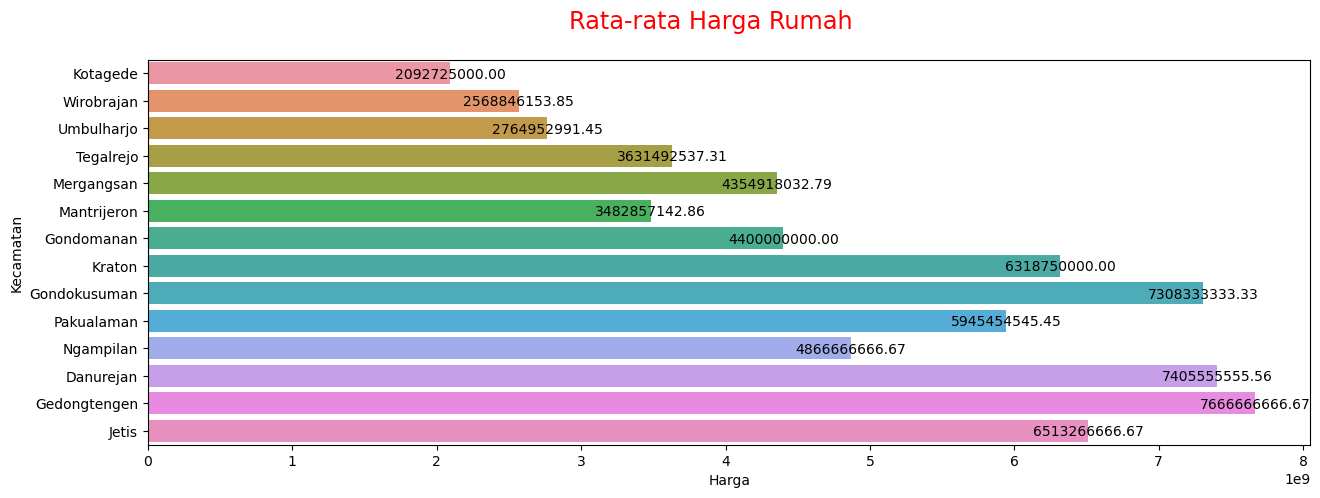

In [88]:
result = data.groupby(['Kecamatan'])['Harga'].mean()
labels = ["Kotagede","Wirobrajan","Umbulharjo","Tegalrejo","Mergangsan","Mantrijeron","Gondomanan","Kraton",
        "Gondokusuman","Pakualaman","Ngampilan","Danurejan","Gedongtengen","Jetis"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-rata Harga Rumah', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values)

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Harga')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.show()

### Rata2 Luas Tanah berdasarkan Kecamatan

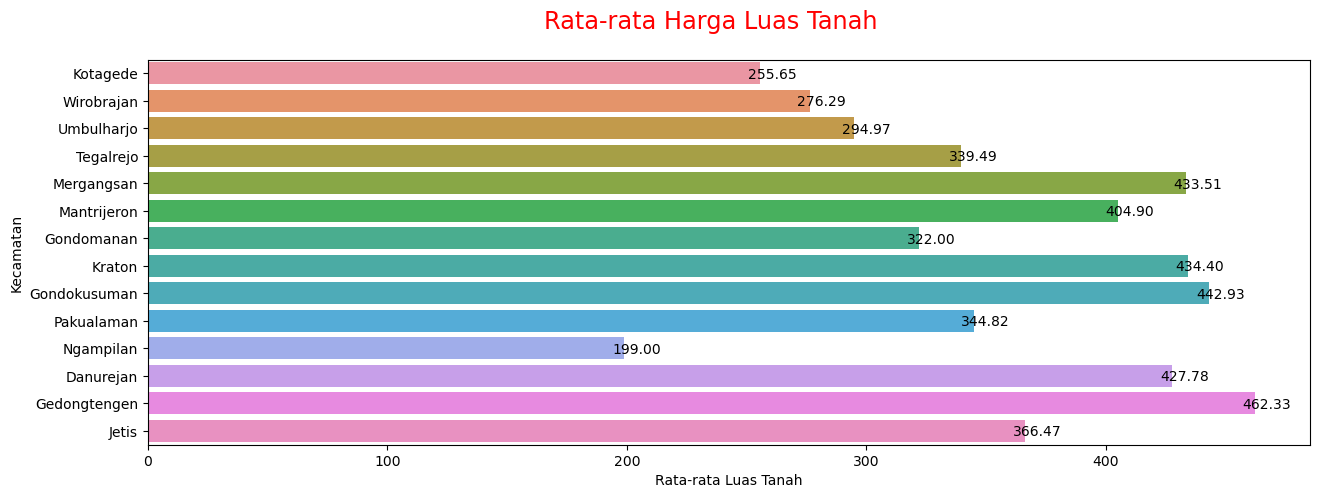

In [89]:
result = data.groupby(['Kecamatan'])['LT'].mean()
labels = ["Kotagede","Wirobrajan","Umbulharjo","Tegalrejo","Mergangsan","Mantrijeron","Gondomanan","Kraton",
        "Gondokusuman","Pakualaman","Ngampilan","Danurejan","Gedongtengen","Jetis"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-rata Harga Luas Tanah', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values)

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Rata-rata Luas Tanah')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.show()

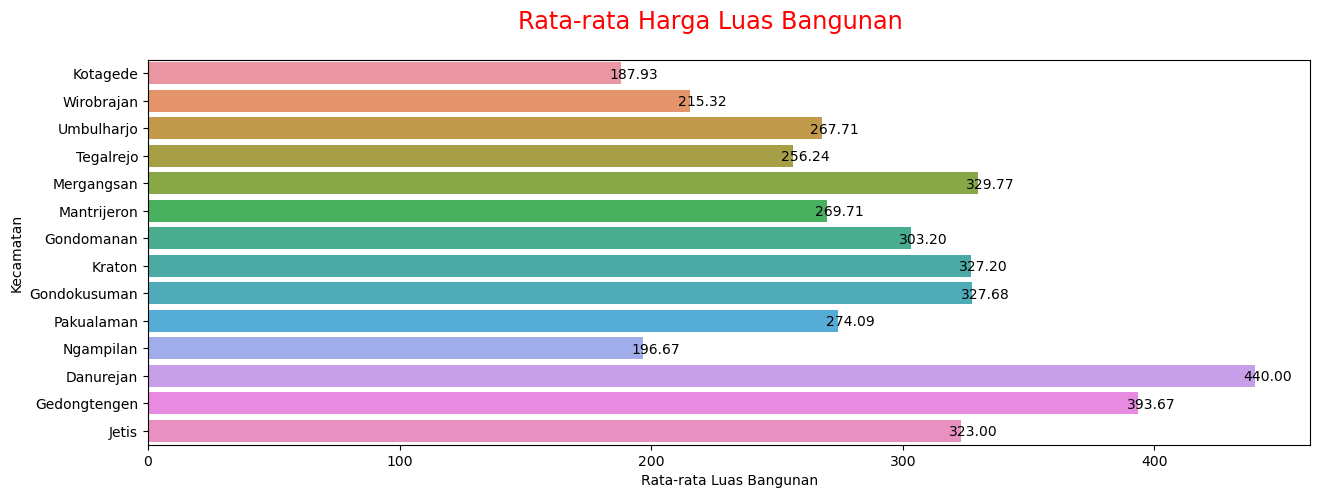

In [90]:
#LUAS BANGUNAN

result = data.groupby(['Kecamatan'])['LB'].mean()
labels = ["Kotagede","Wirobrajan","Umbulharjo","Tegalrejo","Mergangsan","Mantrijeron","Gondomanan","Kraton",
        "Gondokusuman","Pakualaman","Ngampilan","Danurejan","Gedongtengen","Jetis"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Rata-rata Harga Luas Bangunan', fontsize = 'xx-large',  color='red')

ax = sns.barplot(y = labels, x = result.values)

ax.set_ylabel('Kecamatan')
ax.set_xlabel('Rata-rata Luas Bangunan')

for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')
    
plt.show()

### Jumlah Rumah berdasarkan Lantai

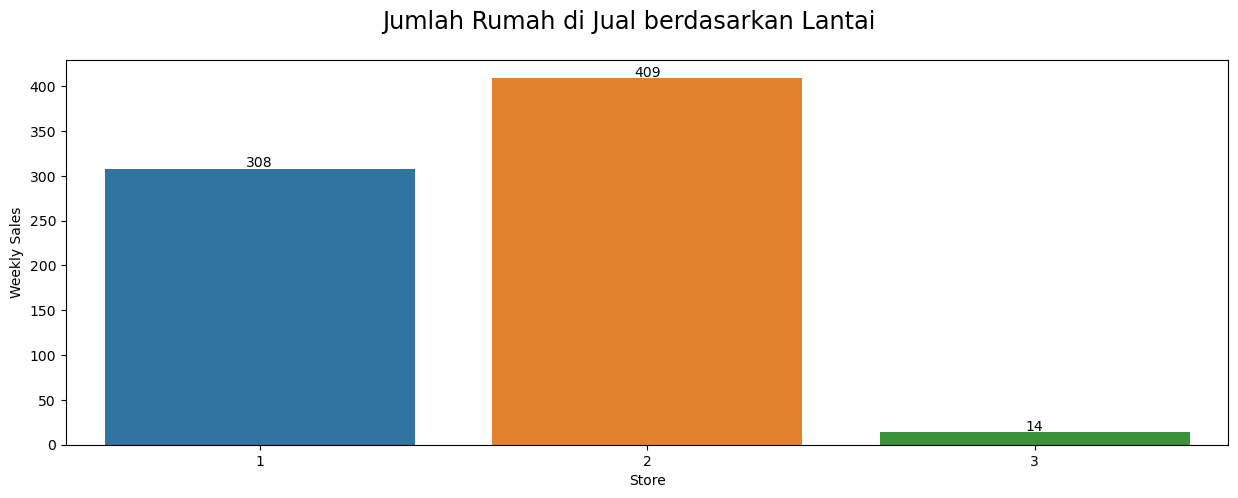

In [85]:
#Jumlah lantai
result = data.groupby(['Lantai']).size()


fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah di Jual berdasarkan Lantai', fontsize = 'xx-large')

ax = sns.barplot(y = result.values, x = result.index) 

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')
ax.set_ylabel('Weekly Sales')
ax.set_xlabel('Store')

plt.show() 

### Jumlah Rumah berdasarkan Lantai

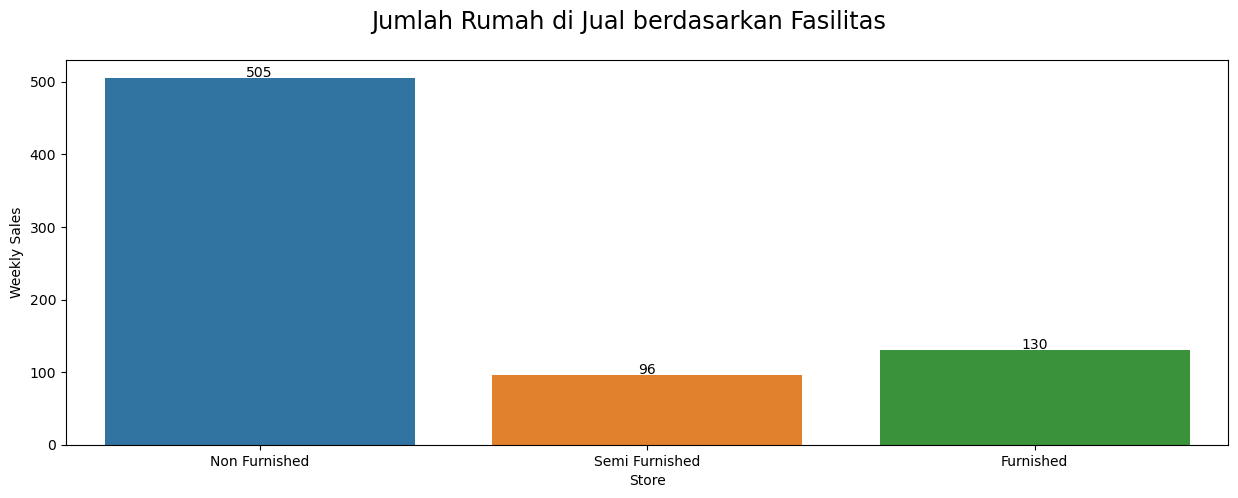

In [97]:
#Fasilitas
result = data.groupby(['Furnished']).size()
Label = ["Non Furnished","Semi Furnished","Furnished"]

fig = plt.figure(figsize = (15,5))  
fig.suptitle('Jumlah Rumah di Jual berdasarkan Fasilitas', fontsize = 'xx-large')

ax = sns.barplot(y = result.values, x = Label) 

for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext =(0, 4), textcoords='offset points')
ax.set_ylabel('Weekly Sales')
ax.set_xlabel('Store')

plt.show() 

### Once the data is cleaned, we split the data into training set and test set to prepare it for our machine learning model in a suitable proportion.

In [100]:
# Spliting target variable and independent variables
X = data.drop(['Harga'], axis = 1)
y = data['Harga']

In [101]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (584, 8)
Size of test set: (147, 8)


# Random Forest

In [102]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [140]:
rfr = RandomForestRegressor(n_estimators=22, random_state=0)
rfr.fit(X_train.values, y_train.values)

RandomForestRegressor(n_estimators=22, random_state=0)

In [141]:
y_pred = rfr.predict(X_test.values)

In [144]:
rmse=[]
r2=[]
accuracy=[]


print(f'RMSE : {mean_squared_error(y_test, y_pred, squared=False):,.2f}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'Accuracy : {round(r2_score(y_test,y_pred)*100,2)}%')


rmse.append(mean_squared_error(y_test, y_pred, squared=False))
r2.append(r2_score(y_test,y_pred))

RMSE : 2,040,244,358.48
R2 : 0.8473045632645234
Accuracy : 84.73%


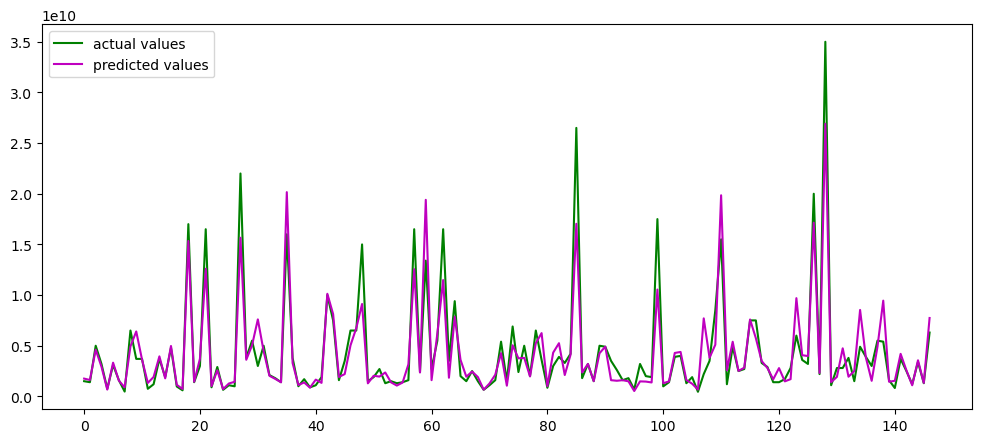

In [145]:
# import numpy 
import numpy as np
# figure size
plt.figure(figsize=(12, 5))
# acutal values
plt.plot([i for i in range(len(y_test))],np.array(y_test), c='g', label="actual values")
# predicted values
plt.plot([i for i in range(len(y_test))],y_pred, c='m',label="predicted values")
plt.legend()
plt.show()

In [147]:
importances = list(rfr.feature_importances_)

predictors_list = list(X)

feature_importances = [(X, round(importance, 3)) for X, importance in zip(predictors_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse=True)

[print('Variabel: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variabel: LT                   Importance: 0.715
Variabel: LB                   Importance: 0.097
Variabel: Kecamatan            Importance: 0.059
Variabel: KT                   Importance: 0.055
Variabel: KM                   Importance: 0.05
Variabel: Lantai               Importance: 0.012
Variabel: Furnished            Importance: 0.008
Variabel: Carport              Importance: 0.003


[None, None, None, None, None, None, None, None]

In [26]:
#save the model

import pickle
filename = 'bestmodel.sav'
pickle.dump(rfr, open(filename,'wb'))

In [27]:
load_model = pickle.load(open(filename, 'rb'))

In [28]:
X_test.head()

,Kecamatan,KT,KM,LT,LB,Lantai,Furnished,Carport
196,2,3,4,120,130,1,0,0
187,2,4,3,124,124,2,0,0
14,1,5,4,535,450,2,0,0
31,0,5,3,297,336,2,0,0
390,2,3,2,92,65,2,0,0


In [29]:
y_test.head()

196    1500000000
187    1400000000
14     5000000000
31     3200000000
390     750000000
Name: Harga, dtype: int64

In [30]:
load_model.predict([[1,5,4,535,450,2,0,0]])

array([4.61363636e+09])

In [31]:
8.87405303*100000000

887405303.0000001

In [32]:
load_model.predict([[2,3,2,92,65,2,1,0]])

array([7.62045455e+08])

In [33]:
load_model.predict([[2,4,2,87,140,2,0,1]])

array([8.87405303e+08])

In [34]:
100-2040244358.4769936

-2040244258.4769936